In [1]:
import json
from pprint import pprint

sensor_list = [6, 7, 8]
keys = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'x', 'D_p1', 'D_p2', 'D_p3', 'D_p4', 'D_p5', 'D_p6']
data = {}

for key in keys:
    data[key] = json.load(open(str(key) + '.json'))

In [2]:
import csv

refined_data = {}
for key in keys:
    refined_data[key] = []
    with open(str(key) + ".csv", 'w') as writer:
        for d in range(len(data[key])):
            if(data[key][d]['model'] == 'smartcondo.sensorevent'):
                
                entry = [data[key][d]['fields']['sensor'],\
                         data[key][d]['fields']['timestamp'],\
                         int(str(str(data[key][d]['fields']['data']).split(",")[0]).split(":")[1])]
                row = str(str((data[key][d]['fields']['sensor'])) + ', ' +\
                          str((data[key][d]['fields']['timestamp'])) + ',' +\
                          (data[key][d]['fields']['data']).split(",")[0].split(":")[1] + '\n')

                refined_data[key].append(entry)
                writer.write(row)
            

#print(str(d) + ' -> '  + str(str((data[d]['fields']['sensor'])) + ', '\
#        + str((data[d]['fields']['timestamp'])) + ','\
#        + (data[d]['fields']['data']).split(",")[0].split(":")[1] + '\n')

In [3]:
import numpy as np

sensor_model = {}

for sensor in sensor_list:
    sensor_model[sensor] = []
    for key in keys:
        temp = [x[2] for x in refined_data[key] if x[0] == sensor]
        ave = sum(temp) / len(temp)
        std = np.std(temp)
        if ((sensor == 6 or sensor == 7) and (key=='x' or key=='D_p1' or key=='D_p2' or key=='D_p3' or key=='D_p4' or key=='D_p5' or key=='D_p6')):
            sensor_model[sensor].append([key, ave, std])
        elif (sensor == 8 and (key=='x' or key=='D1' or key=='D2' or key=='D3' or key=='D4' or key=='D5' or key=='D6')):
            sensor_model[sensor].append([key, ave, std])

In [4]:
import matplotlib.pyplot as plt

def plotting(sensor, data, direction):
    if (direction == 'diagonal'):
        x = [t for t in sensor_model[sensor] if t[0] == 'D1' \
                                             or t[0] == 'D2' \
                                             or t[0] == 'D3' \
                                             or t[0] == 'D4' \
                                             or t[0] == 'D5' \
                                             or t[0] == 'D6' \
                                             or t[0] == 'x']
        xdata = [x[i][1] for i in range(len(x))]
        plt.plot(xdata)
        plt.ylabel('Distance')
        plt.ylabel('RSSI Average')
        print(sensor)
        plt.show()

    elif (direction == 'offdiagonal'):
        x = [t for t in sensor_model[sensor] if t[0] == 'D_p1' \
                                             or t[0] == 'D_p2' \
                                             or t[0] == 'D_p3' \
                                             or t[0] == 'D_p4' \
                                             or t[0] == 'D_p5' \
                                             or t[0] == 'D_p6' \
                                             or t[0] == 'x']
        xdata = [x[i][1] for i in range(len(x))]
        plt.plot(xdata)
        plt.ylabel('Distance')
        plt.ylabel('RSSI Average')
        print(sensor)
        plt.show()
                    
    if (direction == 'diagonal'):
        x = [t for t in sensor_model[sensor] if t[0] == 'D1' \
                                             or t[0] == 'D2' \
                                             or t[0] == 'D3' \
                                             or t[0] == 'D4' \
                                             or t[0] == 'D5' \
                                             or t[0] == 'D6' \
                                             or t[0] == 'x']
        xdata = [x[i][2] for i in range(len(x))]
        plt.plot(xdata)
        plt.ylabel('Distance')
        plt.ylabel('RSSI STD')
        print(sensor)
        plt.show()

    elif (direction == 'offdiagonal'):
        x = [t for t in sensor_model[sensor] if t[0] == 'D_p1' \
                                             or t[0] == 'D_p2' \
                                             or t[0] == 'D_p3' \
                                             or t[0] == 'D_p4' \
                                             or t[0] == 'D_p5' \
                                             or t[0] == 'D_p6' \
                                             or t[0] == 'x']
        xdata = [x[i][2] for i in range(len(x))]
        plt.plot(xdata)
        plt.ylabel('Distance')
        plt.ylabel('RSSI STD')
        print(sensor)
        plt.show()
                

6


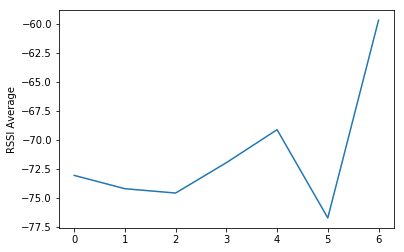

6


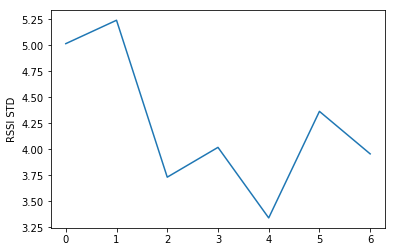

7


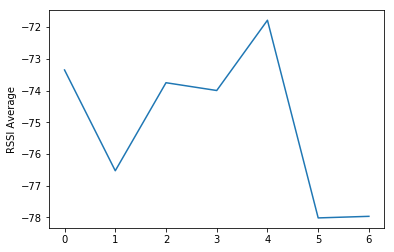

7


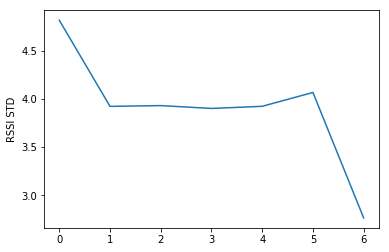

8


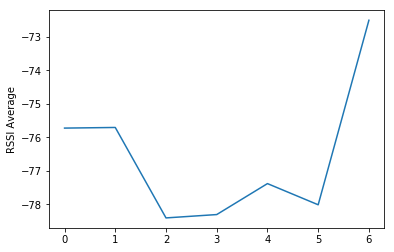

8


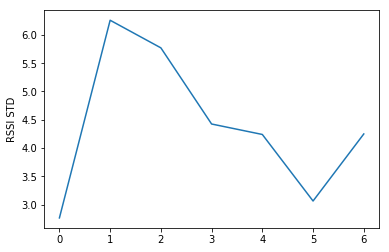

In [5]:
for sensor in sensor_list:
    if (sensor == 6 or sensor == 7):
        plotting(sensor, sensor_model, 'offdiagonal')
    else:
        plotting(sensor, sensor_model, 'diagonal')

6


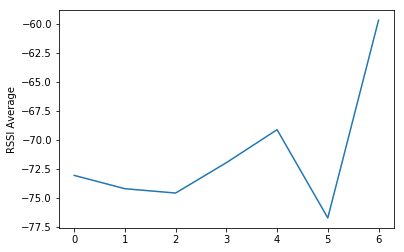

6


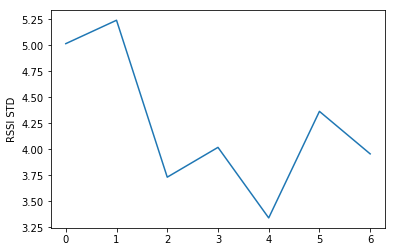

In [16]:
sensor = 6
mdata = []
x = [t for t in sensor_model[sensor] if t[0] == 'D_p1' \
                                             or t[0] == 'D_p2' \
                                             or t[0] == 'D_p3' \
                                             or t[0] == 'D_p4' \
                                             or t[0] == 'D_p5' \
                                             or t[0] == 'D_p6' \
                                             or t[0] == 'x']
mdata = [x[i][1] for i in range(len(x))]
plt.plot(mdata)
plt.ylabel('Distance')
plt.ylabel('RSSI Average')
print(sensor)
plt.show()

vdata = []
x = [t for t in sensor_model[sensor] if t[0] == 'D_p1' \
                                             or t[0] == 'D_p2' \
                                             or t[0] == 'D_p3' \
                                             or t[0] == 'D_p4' \
                                             or t[0] == 'D_p5' \
                                             or t[0] == 'D_p6' \
                                             or t[0] == 'x']
vdata = [x[i][2] for i in range(len(x))]
plt.plot(vdata)
plt.ylabel('Distance')
plt.ylabel('RSSI STD')
print(sensor)
plt.show()

In [17]:
import numpy as np

refined_data
samples = []
for i in range(len(vdata)):
    samples.append(np.random.normal(mdata[i], vdata[i], 10000))
    

1000

In [363]:
for sensor in sensor_list:
    if sensor == 6:
        for row in range(len(sensor_model[sensor])):
            if sensor_model[sensor][row][0] == 'D_p1':
                sensor_model[sensor][row][0] = 4.23
            elif sensor_model[sensor][row][0] == 'D_p2':
                sensor_model[sensor][row][0] = 3.63
            elif sensor_model[sensor][row][0] == 'D_p3':
                sensor_model[sensor][row][0] = 3.02
            elif sensor_model[sensor][row][0] == 'x':
                sensor_model[sensor][row][0] = 2.42
            elif sensor_model[sensor][row][0] == 'D_p4':
                sensor_model[sensor][row][0] = 1.81
            elif sensor_model[sensor][row][0] == 'D_p5':
                sensor_model[sensor][row][0] = 1.21
            elif sensor_model[sensor][row][0] == 'D_p6':
                sensor_model[sensor][row][0] = 0.60
            #else:
                #del sensor_model[sensor][row]
    elif sensor == 7:
        for row in range(len(sensor_model[sensor])):
            if sensor_model[sensor][row][0] == 'D_p6':
                sensor_model[sensor][row][0] = 4.23
            elif sensor_model[sensor][row][0] == 'D_p5':
                sensor_model[sensor][row][0] = 3.63
            elif sensor_model[sensor][row][0] == 'D_p4':
                sensor_model[sensor][row][0] = 3.02
            elif sensor_model[sensor][row][0] == 'x':
                sensor_model[sensor][row][0] = 2.42
            elif sensor_model[sensor][row][0] == 'D_p3':
                sensor_model[sensor][row][0] = 1.81
            elif sensor_model[sensor][row][0] == 'D_p2':
                sensor_model[sensor][row][0] = 1.21
            elif sensor_model[sensor][row][0] == 'D_p1':
                sensor_model[sensor][row][0] = 0.60
            #else:
                #del sensor_model[sensor][row]
    elif sensor == 8:
        print('8')
        for row in range(len(sensor_model[sensor])):
            if sensor_model[sensor][row][0] == 'D1':
                sensor_model[sensor][row][0] = 4.23
            elif sensor_model[sensor][row][0] == 'D2':
                sensor_model[sensor][row][0] = 3.63
            elif sensor_model[sensor][row][0] == 'D3':
                sensor_model[sensor][row][0] = 3.02
            elif sensor_model[sensor][row][0] == 'x':
                sensor_model[sensor][row][0] = 2.42
            elif sensor_model[sensor][row][0] == 'D4':
                sensor_model[sensor][row][0] = 1.81
            elif sensor_model[sensor][row][0] == 'D5':
                sensor_model[sensor][row][0] = 1.21
            elif sensor_model[sensor][row][0] == 'D6':
                sensor_model[sensor][row][0] = 0.60
            #else:
                #del sensor_model[sensor][row]
pprint(sensor_model) -59, -76, -69, -73, -74, -74

8
{6: [[2.42, -73.05963302752293, 5.017503660646124],
     [4.23, -74.20754716981132, 5.242635411612729],
     [3.63, -74.57870370370371, 3.7333965998093164],
     [3.02, -71.9675925925926, 4.020072984036753],
     [1.81, -69.12727272727273, 3.3414996385920412],
     [1.21, -76.72037914691943, 4.366233190441073],
     [0.6, -59.70982142857143, 3.9574400956893063]],
 7: [[2.42, -73.35321100917432, 4.817686619978428],
     [0.6, -76.52830188679245, 3.9230993407210897],
     [1.21, -73.75462962962963, 3.9311171783900303],
     [1.81, -74.0, 3.9015666369065416],
     [3.02, -71.78636363636363, 3.9236804909474112],
     [3.63, -78.01421800947867, 4.067532611410624],
     [4.23, -77.96428571428571, 2.7643410847167647]],
 8: [[4.23, -75.72169811320755, 2.768233028042186],
     [3.63, -75.70283018867924, 6.2579301772422795],
     [3.02, -78.40094339622641, 5.770337213961914],
     [1.81, -78.30092592592592, 4.426059098414885],
     [1.21, -77.37719298245614, 4.241380011429566],
     [0.6, -78.

In [6]:
sensor_model

{6: [['x', -73.05963302752293, 5.017503660646124],
  ['D_p1', -74.20754716981132, 5.242635411612729],
  ['D_p2', -74.57870370370371, 3.7333965998093164],
  ['D_p3', -71.9675925925926, 4.020072984036753],
  ['D_p4', -69.12727272727273, 3.3414996385920412],
  ['D_p5', -76.72037914691943, 4.366233190441073],
  ['D_p6', -59.70982142857143, 3.9574400956893063]],
 7: [['x', -73.35321100917432, 4.817686619978428],
  ['D_p1', -76.52830188679245, 3.9230993407210897],
  ['D_p2', -73.75462962962963, 3.9311171783900303],
  ['D_p3', -74.0, 3.9015666369065416],
  ['D_p4', -71.78636363636363, 3.9236804909474112],
  ['D_p5', -78.01421800947867, 4.067532611410624],
  ['D_p6', -77.96428571428571, 2.7643410847167647]],
 8: [['D1', -75.72169811320755, 2.768233028042186],
  ['D2', -75.70283018867924, 6.2579301772422795],
  ['D3', -78.40094339622641, 5.770337213961914],
  ['D4', -78.30092592592592, 4.426059098414885],
  ['D5', -77.37719298245614, 4.241380011429566],
  ['D6', -78.009009009009, 3.066810108755

In [521]:
#########################################
####### Particle Filter Algorithm #######
#########################################

%matplotlib inline
from __future__ import division, print_function
from book_format import load_style
load_style()
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    print(particles)
    return particles

def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    #pprint(particles)
    return particles

#Parameters: u = Control input | std = noise
def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # update heading
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi

    # move in the (noisy) commanded direction
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist  

def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

def update(particles, weights, z, R, landmarks):
    distance_points = [0.6, 1.21, 1.81, 3.02, 3.63, 4.23, 2.42]
    weights.fill(1.)
    
    #for landmark in enumerate(landmarks):
    #    distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
    
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        
        #if i == 0: #6
        #    for particle in range(len(distance)):
        #        idx = find_nearest(distance_points, distance[particle])
        #        m = sensor_model[6][idx][1]
        #        v = sensor_model[6][idx][2]
                #v = 1.e-300
        #        weights[particle] *= scipy.stats.norm(m, v).pdf(z[i] + np.random.normal(0, R, 1))
        #if i == 1: #7
        #    for particle in range(len(distance)):
        #        idx = find_nearest(distance_points, distance[particle])
        #        m = sensor_model[6][idx][1]
        #        v = sensor_model[6][idx][2]
                #v = 1.e-300
        #        weights[particle] *= scipy.stats.norm(m, v).pdf(z[i] + np.random.normal(0, R, 1))
        #if i == 2: #8
        #    for particle in range(len(distance)):
        #        idx = find_nearest(distance_points, distance[particle])
        #        m = sensor_model[6][idx][1]
        #        v = sensor_model[6][idx][2]
                #v = 1.e-300
        #        weights[particle] *= scipy.stats.norm(m, v).pdf(z[i] + np.random.normal(0, R, 1))
        
        #print(distance[0][2])
        weights *= scipy.stats.norm(distance + + np.random.normal(0, R), R).pdf(z[i] + np.random.normal(0, R))
        
    weights += 1.e-300     # avoid round-off to zero
    weights /= sum(weights) # normalize 
    
def simple_resample(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. # avoid round-off error
    indexes = np.searchsorted(cumulative_sum, random(N))

    # resample according to indexes
    particles[:] = particles[indexes]
    weights.fill(1.0 / N)
    
def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill (1.0 / len(weights))
    
def get_actual_position(x, previous_pos):
    new_pos = previous_pos + (0.5, 0.5)
    return new_pos
    
def neff(weights):
    return 1. / np.sum(np.square(weights))

In [522]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
import scipy.stats

X = 3
Y = 3.8

def run_pf1(N, iters=18, sensor_std_err=.1, do_plot=True, plot_particles=False, xlim=(0, X), ylim=(0, Y), initial_x=None):
    landmarks = np.array([[0, 0], [3, 3.8], [3, 0]])
    NL = len(landmarks)
    plt.figure()
   
    # create particles and weights
    if initial_x is not None:
        particles = create_gaussian_particles(mean=initial_x, std=(5, 5, np.pi/4), N=N)
    else:
        particles = create_uniform_particles((0, X), (0, Y), (0, 6.28), N)
    weights = np.zeros(N)

    # plotting particles
    if plot_particles:
        alpha = .20
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], alpha=alpha, color='g')
    
    xs = []
    actual_pos = np.array([0., 0.])

    #plt.legend([p1, p2], ['Actual', 'PF'], loc=4, numpoints=1)
    #plt.xlim(*xlim)
    #plt.ylim(*ylim)
    
    
    for x in range(iters):
        actual_pos = get_actual_position(x, actual_pos)

        # distance from robot to each landmark
        zs = (norm(landmarks - actual_pos, axis=1) + (randn(NL) * sensor_std_err))

        # move diagonally forward to (x+1, x+1)
        predict(particles, u=(0.00, 0.5), std=(.1, .1))

        # incorporate measurements
        update(particles, weights, z=zs, R=sensor_std_err, landmarks=landmarks)
        
        # resample if too few effective particles
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)

        mu, var = estimate(particles, weights)
        xs.append(mu)
        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1], color='k', marker=',', s=1)
            
        p1 = plt.scatter(actual_pos[0], actual_pos[1], marker='+', color='b', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
        plt.xlim(left = 0)
        plt.ylim(bottom = 0)
        plt.xlim(right = 4.5)
        plt.ylim(top = 3.5)
        plt.show()
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    
    print('final position error, variance:\n\t', mu - np.array([iters, iters]), var)
    #plt.show()
    #print(particles)

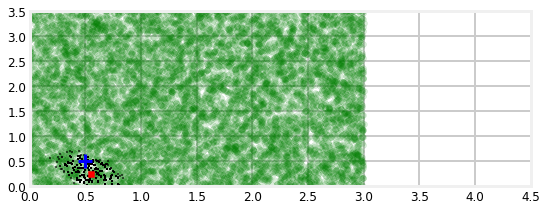

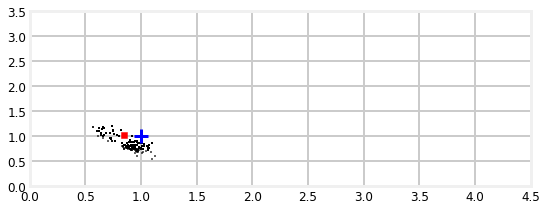

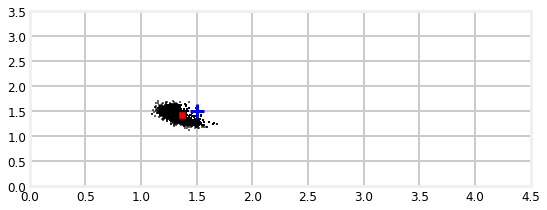

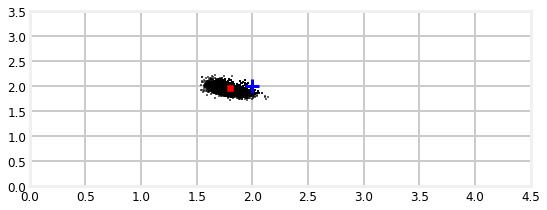

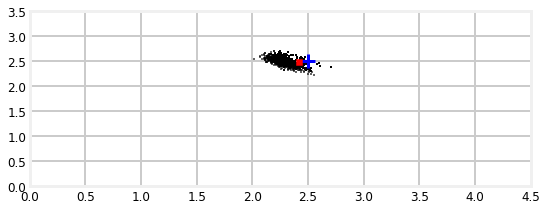

final position error, variance:
	 [-2.576 -2.507] [0.015 0.005]


In [526]:
import random

random.seed(2)
run_pf1(N=10000, iters=5, plot_particles=True, xlim=(0, 3), ylim=(0, 3.8))